In [183]:
import pandas as pd
import matplotlib
%matplotlib inline

In [189]:
with open('European_Red_List_2017_December.csv') as f:
    df = pd.read_csv(f)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11670 entries, 0 to 11669
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   speciesGroup                     11670 non-null  object
 1   extracted                        11670 non-null  object
 2   taxonomicRankKingdom             11670 non-null  object
 3   taxonomicRankPhylum              11670 non-null  object
 4   taxonomicRankClass               11670 non-null  object
 5   taxonomicRankOrder               11670 non-null  object
 6   taxonomicRankFamily              11670 non-null  object
 7   taxonomicRankGenus               11409 non-null  object
 8   taxonomicRankSpecies             11409 non-null  object
 9   taxonomicRankSubspecies          74 non-null     object
 10  scientificName                   261 non-null    object
 11  taxonomicAuthority               3722 non-null   object
 12  taxonomicNotes                  

In [3]:
df.describe()

,speciesGroup,extracted,taxonomicRankKingdom,taxonomicRankPhylum,taxonomicRankClass,taxonomicRankOrder,taxonomicRankFamily,taxonomicRankGenus,taxonomicRankSpecies,taxonomicRankSubspecies,...,populationTrend,range,population,habitat,threats,conservationAction,useAndTrade,redListReviewers,redListAssessors,redListContributors
count,11670,11670,11670,11670,11670,11670,11670,11409,11409,74,...,11385,11316,11663,11665,11661,11660,8263,5109,11092,2042
unique,15,8,2,7,22,163,593,2684,8117,71,...,5,11221,9349,10922,8021,9557,2415,253,2114,404
top,Bees,2011_September,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,HYDROBIIDAE,Andrena,officinalis,lusitanicum,...,Unknown,\n,Abundant.,This species lives in the dry temperate shrub ...,The threats to this species are unknown.,No information.,This species is not traded or exploited commer...,"Bushell, M. & Cálix, M.","van Swaay, C., Wynhoff, I., Verovnik, R., Wiem...","Danielczak, A."
freq,1965,4460,9250,4365,4365,1965,588,423,24,2,...,6202,25,167,41,608,257,748,389,482,448


In [192]:
df[df['taxonomicRankFamily']=='FELIDAE'].isna()

,speciesGroup,extracted,taxonomicRankKingdom,taxonomicRankPhylum,taxonomicRankClass,taxonomicRankOrder,taxonomicRankFamily,taxonomicRankGenus,taxonomicRankSpecies,taxonomicRankSubspecies,...,populationTrend,range,population,habitat,threats,conservationAction,useAndTrade,redListReviewers,redListAssessors,redListContributors
6041,False,False,False,False,False,False,False,True,True,True,...,True,False,False,False,False,False,True,True,False,True
6042,False,False,False,False,False,False,False,True,True,True,...,True,False,False,False,False,False,True,True,False,True
6043,False,False,False,False,False,False,False,True,True,True,...,True,False,False,False,False,False,True,True,False,True
6044,False,False,False,False,False,False,False,True,True,True,...,True,False,False,False,False,False,True,True,False,True


In [4]:
df['population'].head()

0    It can be locally common in suitable habitat, ...
1    Populations of this species are very fragmente...
2    The population is approximately 500-1,500 adul...
3    it is reported to be declining (including loca...
4    In Spain, it is abundant over much of its rang...
Name: population, dtype: object

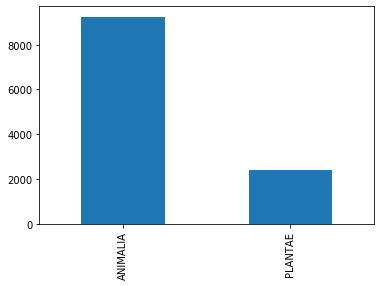

In [5]:
df['taxonomicRankKingdom'].value_counts().plot(kind='bar')

In [6]:
feature_elimination = pd.DataFrame(columns=['name', 'values', 'missing_percent'])
for c in df.columns:
    print(f"{c} : {df[c].count()} values. {100*(df.index.stop - df[c].count())/df.index.stop:.3}% missing")
    feature_elimination = feature_elimination.append({'name': c, 'values': df[c].count(), 'missing_percent': int(100*(df.index.stop - df[c].count())/df.index.stop)}, ignore_index=True)

speciesGroup : 11670 values. 0.0% missing
extracted : 11670 values. 0.0% missing
taxonomicRankKingdom : 11670 values. 0.0% missing
taxonomicRankPhylum : 11670 values. 0.0% missing
taxonomicRankClass : 11670 values. 0.0% missing
taxonomicRankOrder : 11670 values. 0.0% missing
taxonomicRankFamily : 11670 values. 0.0% missing
taxonomicRankGenus : 11409 values. 2.24% missing
taxonomicRankSpecies : 11409 values. 2.24% missing
taxonomicRankSubspecies : 74 values. 99.4% missing
scientificName : 261 values. 97.8% missing
taxonomicAuthority : 3722 values. 68.1% missing
taxonomicNotes : 3399 values. 70.9% missing
endemicToEurope : 11670 values. 0.0% missing
europeanRegionalRedListCategory : 11259 values. 3.52% missing
europeanRegionalRedListCriteria : 2105 values. 82.0% missing
endemicToEu : 10450 values. 10.5% missing
euRegionalRedListCategory : 10151 values. 13.0% missing
euRegionalRedListCriteria : 1901 values. 83.7% missing
euScope : 9757 values. 16.4% missing
conservationStatusAnalysis : 26

In [7]:
feature_elimination.sort_values('missing_percent', ascending=False)

,name,values,missing_percent
9,taxonomicRankSubspecies,74,99
20,conservationStatusAnalysis,261,97
10,scientificName,261,97
18,euRegionalRedListCriteria,1901,83
31,redListContributors,2042,82
15,europeanRegionalRedListCriteria,2105,81
12,taxonomicNotes,3399,70
11,taxonomicAuthority,3722,68
29,redListReviewers,5109,56
28,useAndTrade,8263,29


Les colonnes _taxonomicRankSubspecies_ , _conservationStatusAnalysis_ , _scientificName_ , _euRegionalRedListCriteria_ , _redListContributors_ , _europeanRegionalRedListCriteria_ , _taxonomicNotes_ , _taxonomicAuthority_ et _redListReviewers_ contiennent une majorité de valeurs manquantes, cependant on peut supposer qu'elle ne sont pas toutes importantes pour notre visualisation.  
De manière générale on cherche maintenant à déterminer pour chaque colonne si elle est utile, et si elle l'est comment palier aux données manquantes.

In [8]:
dropcols = ['extracted', 'taxonomicRankSubspecies', 'taxonomicAuthority', 'taxonomicNotes', 'europeanRegionalRedListCategory', 'europeanRegionalRedListCriteria', 'endemicToEurope', 'endemicToEu', 'euScope', 'redListReviewers', 'redListAssessors', 'redListContributors', 'habitat']
print(len(dropcols))

12


In [9]:
df_cleared = df.drop(columns=dropcols)

In [10]:
df.to_csv('European_Red_List_2017_December_cleared.csv')

# Rearranging data

In [197]:
with open('European_Red_List_2017_December_cleared.csv') as f:
    df = pd.read_csv(f)
df = df.dropna(subset=['taxonomicRankGenus'])

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11409 entries, 0 to 11669
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       11409 non-null  int64 
 1   speciesGroup                     11409 non-null  object
 2   extracted                        11409 non-null  object
 3   taxonomicRankKingdom             11409 non-null  object
 4   taxonomicRankPhylum              11409 non-null  object
 5   taxonomicRankClass               11409 non-null  object
 6   taxonomicRankOrder               11409 non-null  object
 7   taxonomicRankFamily              11409 non-null  object
 8   taxonomicRankGenus               11409 non-null  object
 9   taxonomicRankSpecies             11409 non-null  object
 10  taxonomicRankSubspecies          74 non-null     object
 11  scientificName                   0 non-null      object
 12  taxonomicAuthority              

In [199]:
a = df.groupby(['taxonomicRankKingdom', 'taxonomicRankPhylum', 'taxonomicRankClass', 'taxonomicRankOrder', 'taxonomicRankFamily', 'taxonomicRankGenus', 'taxonomicRankSpecies', 'taxonomicRankSubspecies']).sum()

###  Animaux

In [213]:
import csv

csv_columns = ['id', 'value']
phyloTree =  ['taxonomicRankKingdom', 'taxonomicRankPhylum', 'taxonomicRankClass', 'taxonomicRankOrder', 'taxonomicRankFamily', 'taxonomicRankGenus', 'taxonomicRankSpecies', 'taxonomicRankSubspecies']
col = 'europeanRegionalRedListCategory'
data_csv = []
def recur_fill(str_base, parent, idx, val):
    data_csv.append({'id': str_base, 'value': val})
    if idx+1 < len(phyloTree) - 1:
        if idx-1 < 0:
            for a in df.loc[:, phyloTree[idx]].unique():
                val = df.loc[df[phyloTree[idx]]==a][col].sum()/df.loc[df[phyloTree[idx]]==a][col].count()
                val = float(f'{val:.3f}')
                recur_fill(f'{str_base}.{a}', a, idx + 1, val)
        else:
            for a in df[df[phyloTree[idx-1]] == parent].loc[:, phyloTree[idx]].unique():
                val = df.loc[df[phyloTree[idx]]==a][col].sum()/df.loc[df[phyloTree[idx]]==a][col].count()
                val = float(f'{val:.3f}')
                recur_fill(f'{str_base}.{a}', a, idx + 1, val)

print('aaaaaa')
val = df.loc[df['taxonomicRankKingdom']=='ANIMALIA']['europeanRegionalRedListCategory'].sum()/df.loc[df['taxonomicRankKingdom']=='ANIMALIA']['europeanRegionalRedListCategory'].count()
val = float(f'{val:.3f}')
recur_fill('ANIMALIA', 'ANIMALIA', 1, val)
print('bbbbbb')

csv_file = "phylo_animal_genus.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in data_csv:
            writer.writerow(data)
except IOError:
    print("I/O error")

aaaaaa
bbbbbb


In [201]:
df.loc[:, 'europeanRegionalRedListCategory'].unique()

array(['NT', 'VU', 'LC', 'EN', nan, 'DD', 'CR', 'NE', 'EX', 'RE', 'EW',
       'CR (PE)'], dtype=object)

In [202]:
df.shape

(11409, 33)

In [203]:
idxs = df.loc[df['europeanRegionalRedListCategory'].isna()].index
df = df.drop(idxs)
drop = ['DD', 'NE', 'RE', 'CR (PE)']
for d in drop :
    idxs = df.loc[df['europeanRegionalRedListCategory'] == d].index
    df = df.drop(idxs)

In [204]:
df.shape

(8620, 33)

In [205]:
bck = df.copy()

In [206]:
def CatToInt(x):
    if x == 'EX':
        return -3
    elif x == 'EW':
        return -2
    elif x == 'CR':
        return -1
    elif x == 'EN':
        return 0
    elif x == 'VU':
        return 1
    elif x == 'NT':
        return 2
    elif x == 'LC':
        return 3

In [207]:
df.loc[:, 'europeanRegionalRedListCategory'] = df['europeanRegionalRedListCategory'].apply(CatToInt)

In [208]:
bck.loc[:, 'europeanRegionalRedListCategory'].unique()

array(['NT', 'VU', 'LC', 'EN', 'CR', 'EX', 'EW'], dtype=object)

In [209]:
df.loc[:, 'europeanRegionalRedListCategory'].unique()

array([ 2,  1,  3,  0, -1, -3, -2])

### Plantes

In [212]:
import csv

csv_columns = ['id', 'value']
phyloTree =  ['taxonomicRankKingdom', 'taxonomicRankPhylum', 'taxonomicRankClass', 'taxonomicRankOrder', 'taxonomicRankFamily', 'taxonomicRankGenus', 'taxonomicRankSpecies', 'taxonomicRankSubspecies']
col = 'europeanRegionalRedListCategory'
data_csv = []
def recur_fill(str_base, parent, idx, val):
    data_csv.append({'id': str_base, 'value': val})
    if idx+1 < len(phyloTree) - 1:
        if idx-1 < 0:
            for a in df.loc[:, phyloTree[idx]].unique():
                val = df.loc[df[phyloTree[idx]]==a][col].sum()/df.loc[df[phyloTree[idx]]==a][col].count()
                val = float(f'{val:.3f}')
                recur_fill(f'{str_base}.{a}', a, idx + 1, val)
        else:
            for a in df[df[phyloTree[idx-1]] == parent].loc[:, phyloTree[idx]].unique():
                val = df.loc[df[phyloTree[idx]]==a][col].sum()/df.loc[df[phyloTree[idx]]==a][col].count()
                val = float(f'{val:.3f}')
                recur_fill(f'{str_base}.{a}', a, idx + 1, val)

print('aaaaaa')
val = df.loc[df['taxonomicRankKingdom']=='PLANTAE']['europeanRegionalRedListCategory'].sum()/df.loc[df['taxonomicRankKingdom']=='PLANTAE']['europeanRegionalRedListCategory'].count()
val = float(f'{val:.3f}')
recur_fill('PLANTAE', 'PLANTAE', 1, val)
print('bbbbbb')

csv_file = "phylo_plant_genus.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in data_csv:
            writer.writerow(data)
except IOError:
    print("I/O error")

aaaaaa
bbbbbb


### Rationales

In [74]:
import csv

csv_columns = ['id', 'value']
phyloTree =  ['taxonomicRankKingdom', 'taxonomicRankPhylum', 'taxonomicRankClass', 'taxonomicRankOrder', 'taxonomicRankFamily', 'taxonomicRankGenus', 'taxonomicRankSpecies', 'taxonomicRankSubspecies']
col = 'threats'
data_csv = []
def recur_fill(str_base, parent, idx, val):
    data_csv.append({'id': str_base, 'value': val})
    if idx+1 < len(phyloTree) + 1:
        if idx-1 < 0:
            for a in df.loc[:, phyloTree[idx]].unique():
                val = ""
                recur_fill(f'{str_base}.{a}', a, idx + 1, val)
        else:
            for a in df[df[phyloTree[idx-1]] == parent].loc[:, phyloTree[idx]].unique():
                if str(a) == 'nan': break
                val = ""
                if idx + 1 > len(phyloTree) - 2:
                    l = []
                    for b in df[df[phyloTree[idx]]==a].loc[:, col]:
                        l.append(b)
                    val = str(l)
                recur_fill(f'{str_base}.{a}', a, idx + 1, val)

recur_fill('PLANTAE', 'PLANTAE', 1, '')

csv_file = "phylo_plant_threats_spec.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in data_csv:
            writer.writerow(data)
except IOError:
    print("I/O error")

In [79]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

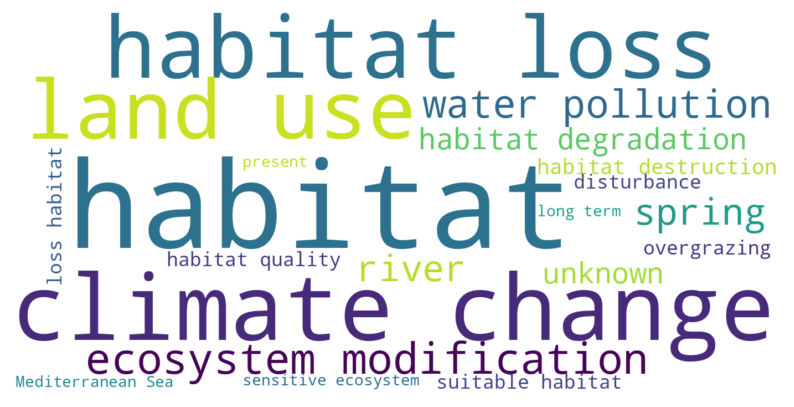

In [221]:
# Start with one review:
text = " ".join(review for review in df[df['taxonomicRankKingdom']=='ANIMALIA'].loc[:, col].dropna())

stopwords = set(STOPWORDS)
stopwords.update(["threat", "species", "threats", "Amosso", "et", "al", "population", "plant", "past", "known", "pers", "Rumsez", "populations"])
stopwords.update(["Commission", "European", "Communities", "due", "threatened", "main", "may", "affect", "pose", "lead", "major", "reported", "decline"])
stopwords.update(["well", "affected", "cause", "ongoing", "although", "site", "subpopulation", "forest", "subpopulations", "affecting", "impact", "future", "Bournérias", "Prat"])
stopwords.update(["occur", "caused", "area", "areas", "Delforge", "GIROD", "believed", "include", "potential", "face", "locally"])
stopwords.update(["increase", "mainly", "parts", "high", "including", "region", "especially", "result", "number", "found"])
stopwords.update(["appear", "range", "probably", "small", "declines", "probably", "considered", "Europe", "occurs", "particularly"])
stopwords.update(["thought", "significant", "island", "Mediterranean Sea", "wild", "nearby", "Turkey"])


# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=20, background_color="white", scale=3.5).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [163]:
df[df['taxonomicRankGenus']=='Isoetes'].loc[:, 'taxonomicRankPhylum'].values

array(['LYCOPODIOPHYTA', 'LYCOPODIOPHYTA', 'LYCOPODIOPHYTA',
       'LYCOPODIOPHYTA', 'LYCOPODIOPHYTA', 'LYCOPODIOPHYTA',
       'LYCOPODIOPHYTA', 'LYCOPODIOPHYTA', 'LYCOPODIOPHYTA'], dtype=object)

In [179]:
df[df['taxonomicRankGenus']=='Salvia'].loc[:, col].dropna().values

array(['It is likely that the population has declined from collection in the wild. In Turkey it is threatened by construction (including roads, dams and other construction), land clearance, fire, urbanisation and tourism (Celep et al. 2010, Kahraman et al. 2011).',
       ' The are no known significant threats to this species and present-day collection from wild populations is assumed to be negligible across its range. ',
       'There appear to be no major threats. It is collected in the wild for its medicinal and aromatic properties, but there are no reports that this is causing declines.',
       'Overgrazing and building of roads, dams and other structures are threats to the species in Turkey (Kahraman et al. 2011). This plant is collected from the wild, but whether collection pressure is significantly impacting the populations is unknown.',
       'The main threat is predation by domestic herbivores (goats and sheeps) and wild ones (rabbits and possibly squirrels) (Scholz and Sant

In [219]:
col = 'threats'
df[df['taxonomicRankKingdom']=='PLANTAE'].loc[:, col]

5842    There are no known past, ongoing or future thr...
5843    In spite of its abundance, locally the species...
5844    There are no current threats to this species. ...
5845    There are no known past, ongoing or future thr...
5846    There are no known threats to this species, al...
                              ...                        
9737    Grazing is prohibited on Athos peninsula. The ...
9738    The causes for the disappearance of the specie...
9739    There are no major threats known for this spec...
9740    The main threat is the stabilisation of the sc...
9742    Competition has been described as an important...
Name: threats, Length: 1962, dtype: object

In [195]:
abc[abc['taxonomicRankFamily']=='FELIDAE']#.loc[:, 'taxonomicRankPhylum'].values

,speciesGroup,extracted,taxonomicRankKingdom,taxonomicRankPhylum,taxonomicRankClass,taxonomicRankOrder,taxonomicRankFamily,taxonomicRankGenus,taxonomicRankSpecies,taxonomicRankSubspecies,...,populationTrend,range,population,habitat,threats,conservationAction,useAndTrade,redListReviewers,redListAssessors,redListContributors


In [196]:
abc

,speciesGroup,extracted,taxonomicRankKingdom,taxonomicRankPhylum,taxonomicRankClass,taxonomicRankOrder,taxonomicRankFamily,taxonomicRankGenus,taxonomicRankSpecies,taxonomicRankSubspecies,...,populationTrend,range,population,habitat,threats,conservationAction,useAndTrade,redListReviewers,redListAssessors,redListContributors
0,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Alytes,cisternasii,NaN,...,Decreasing,This species is restricted to southern and eas...,"It can be locally common in suitable habitat, ...",This species is closely associated with meadow...,The main threats are the loss of suitable Medi...,It is known to occur in Cabañeros and Doñana N...,NaN,NaN,"Pedro Beja, Jaime Bosch, Miguel Tejedo, Miguel...",NaN
1,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Alytes,dickhilleni,NaN,...,Decreasing,This species is restricted to the mountains of...,Populations of this species are very fragmente...,The species is present in pine and oak forests...,The species is threatened by loss of suitable ...,This species is listed on Appendix II of the B...,NaN,NaN,"Jaime Bosch, Miguel Tejedo, Miguel Lizana, Iñi...",NaN
2,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Alytes,muletensis,NaN,...,Increasing,This species is restricted to the Sierra Tramu...,"The population is approximately 500-1,500 adul...",It is currently found only in small streams de...,The major threats are predation by the introdu...,The species is protected by sub-national and n...,NaN,NaN,"Joan Mayol Serra, Richard Griffiths, Jaime Bos...",NaN
3,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Alytes,obstetricans,NaN,...,Decreasing,This species ranges from the northern half of ...,it is reported to be declining (including loca...,"It lives in terrestrial habitats, including te...","General habitat loss, largely to agricultural ...",The species is listed on Appendix II of the Be...,NaN,NaN,"Jaime Bosch, Trevor Beebee, Benedikt Schmidt, ...",NaN
4,Amphibians_Reptiles,2009_November,ANIMALIA,CHORDATA,AMPHIBIA,ANURA,ALYTIDAE,Discoglossus,galganoi,NaN,...,Decreasing,The species is endemic to the Iberian Peninsul...,"In Spain, it is abundant over much of its rang...",It is generally found within or in the direct ...,The main threats to this species are both a ge...,This species is listed on Appendix II of the B...,NaN,NaN,"Jaime Bosch, Pedro Beja, Miguel Tejedo, Miguel...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,Terrestrial_Molluscs,2011_September,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,VITRINIDAE,Semilimax,semilimax,NaN,...,Stable,"The species lives in the Alps, Carpathians, Ge...",The size and trend within the sub-populations ...,The species lives in humid habitats in mountai...,There are currently no known threats to this s...,There are currently no conservation actions in...,This species is not used.,NaN,"Pall-Gergely, B.",NaN
11666,Terrestrial_Molluscs,2011_September,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,VITRINIDAE,Vitrina,pellucida,NaN,...,Stable,"According to AnimalBase (2010), the species oc...",The size and trend within the sub-populations ...,"According to AnimalBase (2010), the species li...",There are currently no major threats to this s...,There are no conservation actions.,This species is not used.,NaN,"Pall-Gergely, B.",NaN
11667,Terrestrial_Molluscs,2011_September,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,VITRINIDAE,Vitrinobrachium,baccettii,NaN,...,Unknown,This species is endemic to the Ligurian Alps i...,There is no information available on the popul...,This species lives in the leaf litter of mount...,The major threat to this species are local sil...,This species is protected under the law of the...,This species is not used.,NaN,"von Proschwitz, T., Falkner, M. Falkner, G.",NaN
11668,Terrestrial_Molluscs,2011_September,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,VITRIN